### Fetching historcal OHLCV data using tradingview API

In [1]:
pip install --upgrade --no-cache-dir git+https://github.com/StreamAlpha/tvdatafeed.git

Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/StreamAlpha/tvdatafeed.git to c:\users\91878\appdata\local\temp\pip-req-build-deyy95hg
  Resolved https://github.com/StreamAlpha/tvdatafeed.git to commit a7034f04509b67224618917c29272796e4fff858
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


  Running command git clone --filter=blob:none --quiet https://github.com/StreamAlpha/tvdatafeed.git 'C:\Users\91878\AppData\Local\Temp\pip-req-build-deyy95hg'


In [2]:
from tvDatafeed import TvDatafeed, Interval

username = 'YourTradingViewUsername'
password = 'YourTradingViewPassword'

tv = TvDatafeed(username, password)

error while signin
you are using nologin method, data you access may be limited


In [3]:
nifty = tv.get_hist(symbol='NIFTY',exchange='NSE',interval=Interval.in_daily,n_bars=10000)
nifty

,symbol,open,high,low,close,volume
datetime,,,,,,
1990-07-03 09:15:00,NSE:NIFTY,279.01999,279.01999,279.01999,279.01999,0.0
1990-07-05 09:15:00,NSE:NIFTY,284.04001,284.04001,284.04001,284.04001,0.0
1990-07-06 09:15:00,NSE:NIFTY,289.04001,289.04001,289.04001,289.04001,0.0
1990-07-09 09:15:00,NSE:NIFTY,289.69000,289.69000,289.69000,289.69000,0.0
1990-07-10 09:15:00,NSE:NIFTY,288.69000,288.69000,288.69000,288.69000,0.0
...,...,...,...,...,...,...
2023-03-22 09:15:00,NSE:NIFTY,17177.44900,17207.25000,17107.85000,17151.90000,185700457.0
2023-03-23 09:15:00,NSE:NIFTY,17097.40000,17205.40000,17045.30100,17076.90000,219171517.0
2023-03-24 09:15:00,NSE:NIFTY,17076.19900,17109.44900,16917.35000,16945.05100,228038299.0


### Preprocessing Nifty historical data

In [4]:
import pandas as pd
import datetime as dt

In [5]:
nifty.reset_index(inplace = True)
nifty

,datetime,symbol,open,high,low,close,volume
0,1990-07-03 09:15:00,NSE:NIFTY,279.01999,279.01999,279.01999,279.01999,0.0
1,1990-07-05 09:15:00,NSE:NIFTY,284.04001,284.04001,284.04001,284.04001,0.0
2,1990-07-06 09:15:00,NSE:NIFTY,289.04001,289.04001,289.04001,289.04001,0.0
3,1990-07-09 09:15:00,NSE:NIFTY,289.69000,289.69000,289.69000,289.69000,0.0
4,1990-07-10 09:15:00,NSE:NIFTY,288.69000,288.69000,288.69000,288.69000,0.0
...,...,...,...,...,...,...,...
7903,2023-03-22 09:15:00,NSE:NIFTY,17177.44900,17207.25000,17107.85000,17151.90000,185700457.0
7904,2023-03-23 09:15:00,NSE:NIFTY,17097.40000,17205.40000,17045.30100,17076.90000,219171517.0
7905,2023-03-24 09:15:00,NSE:NIFTY,17076.19900,17109.44900,16917.35000,16945.05100,228038299.0
7906,2023-03-27 09:15:00,NSE:NIFTY,16984.30100,17091.00000,16918.55100,16985.69900,218418670.0


In [6]:
nifty['datetime'] = nifty['datetime'].dt.date
nifty

,datetime,symbol,open,high,low,close,volume
0,1990-07-03,NSE:NIFTY,279.01999,279.01999,279.01999,279.01999,0.0
1,1990-07-05,NSE:NIFTY,284.04001,284.04001,284.04001,284.04001,0.0
2,1990-07-06,NSE:NIFTY,289.04001,289.04001,289.04001,289.04001,0.0
3,1990-07-09,NSE:NIFTY,289.69000,289.69000,289.69000,289.69000,0.0
4,1990-07-10,NSE:NIFTY,288.69000,288.69000,288.69000,288.69000,0.0
...,...,...,...,...,...,...,...
7903,2023-03-22,NSE:NIFTY,17177.44900,17207.25000,17107.85000,17151.90000,185700457.0
7904,2023-03-23,NSE:NIFTY,17097.40000,17205.40000,17045.30100,17076.90000,219171517.0
7905,2023-03-24,NSE:NIFTY,17076.19900,17109.44900,16917.35000,16945.05100,228038299.0
7906,2023-03-27,NSE:NIFTY,16984.30100,17091.00000,16918.55100,16985.69900,218418670.0


In [7]:
nifty.set_index(nifty['datetime'], drop = True, inplace = True)

In [8]:
nifty

,datetime,symbol,open,high,low,close,volume
datetime,,,,,,,
1990-07-03,1990-07-03,NSE:NIFTY,279.01999,279.01999,279.01999,279.01999,0.0
1990-07-05,1990-07-05,NSE:NIFTY,284.04001,284.04001,284.04001,284.04001,0.0
1990-07-06,1990-07-06,NSE:NIFTY,289.04001,289.04001,289.04001,289.04001,0.0
1990-07-09,1990-07-09,NSE:NIFTY,289.69000,289.69000,289.69000,289.69000,0.0
1990-07-10,1990-07-10,NSE:NIFTY,288.69000,288.69000,288.69000,288.69000,0.0
...,...,...,...,...,...,...,...
2023-03-22,2023-03-22,NSE:NIFTY,17177.44900,17207.25000,17107.85000,17151.90000,185700457.0
2023-03-23,2023-03-23,NSE:NIFTY,17097.40000,17205.40000,17045.30100,17076.90000,219171517.0
2023-03-24,2023-03-24,NSE:NIFTY,17076.19900,17109.44900,16917.35000,16945.05100,228038299.0


In [9]:
nifty.drop('datetime', axis=1, inplace = True)

In [10]:
nifty

,symbol,open,high,low,close,volume
datetime,,,,,,
1990-07-03,NSE:NIFTY,279.01999,279.01999,279.01999,279.01999,0.0
1990-07-05,NSE:NIFTY,284.04001,284.04001,284.04001,284.04001,0.0
1990-07-06,NSE:NIFTY,289.04001,289.04001,289.04001,289.04001,0.0
1990-07-09,NSE:NIFTY,289.69000,289.69000,289.69000,289.69000,0.0
1990-07-10,NSE:NIFTY,288.69000,288.69000,288.69000,288.69000,0.0
...,...,...,...,...,...,...
2023-03-22,NSE:NIFTY,17177.44900,17207.25000,17107.85000,17151.90000,185700457.0
2023-03-23,NSE:NIFTY,17097.40000,17205.40000,17045.30100,17076.90000,219171517.0
2023-03-24,NSE:NIFTY,17076.19900,17109.44900,16917.35000,16945.05100,228038299.0


In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:xlabel='datetime'>

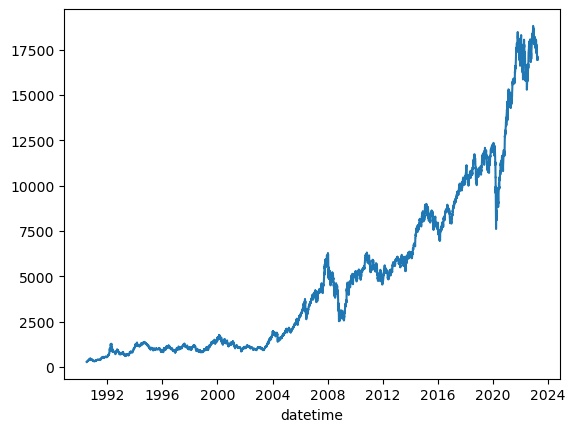

In [12]:
nifty['close'].plot()

In [13]:
nifty.isnull().any()

symbol    False
open      False
high      False
low       False
close     False
volume    False
dtype: bool

In [14]:
nifty['target'] = (nifty['close'].shift(-1)) > (nifty['close'])

In [15]:
nifty

,symbol,open,high,low,close,volume,target
datetime,,,,,,,
1990-07-03,NSE:NIFTY,279.01999,279.01999,279.01999,279.01999,0.0,True
1990-07-05,NSE:NIFTY,284.04001,284.04001,284.04001,284.04001,0.0,True
1990-07-06,NSE:NIFTY,289.04001,289.04001,289.04001,289.04001,0.0,True
1990-07-09,NSE:NIFTY,289.69000,289.69000,289.69000,289.69000,0.0,False
1990-07-10,NSE:NIFTY,288.69000,288.69000,288.69000,288.69000,0.0,True
...,...,...,...,...,...,...,...
2023-03-22,NSE:NIFTY,17177.44900,17207.25000,17107.85000,17151.90000,185700457.0,False
2023-03-23,NSE:NIFTY,17097.40000,17205.40000,17045.30100,17076.90000,219171517.0,False
2023-03-24,NSE:NIFTY,17076.19900,17109.44900,16917.35000,16945.05100,228038299.0,True


In [16]:
nifty['target'] = nifty['target'].apply(lambda x: 1 if x == True else 0)

In [17]:
nifty

,symbol,open,high,low,close,volume,target
datetime,,,,,,,
1990-07-03,NSE:NIFTY,279.01999,279.01999,279.01999,279.01999,0.0,1
1990-07-05,NSE:NIFTY,284.04001,284.04001,284.04001,284.04001,0.0,1
1990-07-06,NSE:NIFTY,289.04001,289.04001,289.04001,289.04001,0.0,1
1990-07-09,NSE:NIFTY,289.69000,289.69000,289.69000,289.69000,0.0,0
1990-07-10,NSE:NIFTY,288.69000,288.69000,288.69000,288.69000,0.0,1
...,...,...,...,...,...,...,...
2023-03-22,NSE:NIFTY,17177.44900,17207.25000,17107.85000,17151.90000,185700457.0,0
2023-03-23,NSE:NIFTY,17097.40000,17205.40000,17045.30100,17076.90000,219171517.0,0
2023-03-24,NSE:NIFTY,17076.19900,17109.44900,16917.35000,16945.05100,228038299.0,1


In [18]:
nifty['5_ma_ratio'] = nifty['close']/nifty['close'].rolling(5).mean()
nifty['21_ma_ratio'] = nifty['close']/nifty['close'].rolling(21).mean()
nifty['62_ma_ratio'] = nifty['close']/nifty['close'].rolling(62).mean()
nifty

,symbol,open,high,low,close,volume,target,5_ma_ratio,21_ma_ratio,62_ma_ratio
datetime,,,,,,,,,,
1990-07-03,NSE:NIFTY,279.01999,279.01999,279.01999,279.01999,0.0,1,NaN,NaN,NaN
1990-07-05,NSE:NIFTY,284.04001,284.04001,284.04001,284.04001,0.0,1,NaN,NaN,NaN
1990-07-06,NSE:NIFTY,289.04001,289.04001,289.04001,289.04001,0.0,1,NaN,NaN,NaN
1990-07-09,NSE:NIFTY,289.69000,289.69000,289.69000,289.69000,0.0,0,NaN,NaN,NaN
1990-07-10,NSE:NIFTY,288.69000,288.69000,288.69000,288.69000,0.0,1,1.009067,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-03-22,NSE:NIFTY,17177.44900,17207.25000,17107.85000,17151.90000,185700457.0,0,1.004993,0.988464,0.966885
2023-03-23,NSE:NIFTY,17097.40000,17205.40000,17045.30100,17076.90000,219171517.0,0,0.999529,0.986171,0.963296
2023-03-24,NSE:NIFTY,17076.19900,17109.44900,16917.35000,16945.05100,228038299.0,1,0.993614,0.980199,0.956790


In [19]:
nifty.dropna(axis = 0, inplace = True)
nifty

,symbol,open,high,low,close,volume,target,5_ma_ratio,21_ma_ratio,62_ma_ratio
datetime,,,,,,,,,,
1990-11-07,NSE:NIFTY,428.20999,428.20999,428.20999,428.20999,0.0,1,1.040410,1.014523,1.157789
1990-11-08,NSE:NIFTY,435.17999,435.17999,435.17999,435.17999,0.0,0,1.038105,1.026557,1.168676
1990-11-09,NSE:NIFTY,430.25000,430.25000,430.25000,430.25000,0.0,0,1.013488,1.013212,1.148165
1990-11-12,NSE:NIFTY,403.06000,403.06000,403.06000,403.06000,0.0,1,0.953862,0.950930,1.070353
1990-11-14,NSE:NIFTY,405.70001,405.70001,405.70001,405.70001,0.0,1,0.964850,0.958842,1.072037
...,...,...,...,...,...,...,...,...,...,...
2023-03-22,NSE:NIFTY,17177.44900,17207.25000,17107.85000,17151.90000,185700457.0,0,1.004993,0.988464,0.966885
2023-03-23,NSE:NIFTY,17097.40000,17205.40000,17045.30100,17076.90000,219171517.0,0,0.999529,0.986171,0.963296
2023-03-24,NSE:NIFTY,17076.19900,17109.44900,16917.35000,16945.05100,228038299.0,1,0.993614,0.980199,0.956790


### Defining function to get the best parameters of the classifier model based on highest precision score

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
param = []
score = []
def get_best_param(ticker):
    for i in [100, 150, 200]:
        for j in [60, 80, 100, 150, 200]:

            model = RandomForestClassifier(n_estimators=i, min_samples_split =j, random_state = 1)

            train = ticker[:-1000]
            test = ticker[1000:]

            features = ['open', 'high', 'low', 'close', '5_ma_ratio', '21_ma_ratio', '62_ma_ratio']
            model.fit(train[features], train['target'])
            pred = pd.Series(model.predict(test[features]), index = test.index)
            param.append([i,j])
            score.append(precision_score(test['target'], pred))
    param_score = pd.DataFrame(param, columns = ['n_estimators', 'min_samples_split'])
    param_score['precision_score'] = score
    
    return param_score

In [21]:
sc = get_best_param(nifty)

In [22]:
sc

,n_estimators,min_samples_split,precision_score
0,100,60,0.762389
1,100,80,0.729382
2,100,100,0.709517
3,100,150,0.672648
4,100,200,0.654745
5,150,60,0.765740
6,150,80,0.729572
7,150,100,0.709613
8,150,150,0.671867
9,150,200,0.656010


### Training the model with best parameters and analysing the classification report and confusion matrix

In [23]:
modn = RandomForestClassifier(n_estimators=150, min_samples_split =60, random_state = 1)
train = nifty[:-1000]
test = nifty[1000:]

features = ['open', 'high', 'low', 'close', '5_ma_ratio', '21_ma_ratio', '62_ma_ratio']
modn.fit(train[features], train['target'])
predictions = pd.Series(modn.predict(test[features]), index = test.index)
print(precision_score(test['target'], predictions))

0.7657397691500525


In [24]:
predictions.value_counts()

1    3812
0    3035
dtype: int64

In [25]:
test['target'].value_counts()

1    3634
0    3213
Name: target, dtype: int64

In [26]:
test['target'].value_counts()/test.shape[0]

1    0.530743
0    0.469257
Name: target, dtype: float64

In [27]:
from sklearn.metrics import classification_report
ncr = classification_report(test["target"], predictions)
print(ncr)

              precision    recall  f1-score   support

           0       0.76      0.72      0.74      3213
           1       0.77      0.80      0.78      3634

    accuracy                           0.77      6847
   macro avg       0.77      0.76      0.76      6847
weighted avg       0.77      0.77      0.76      6847



In [28]:
from sklearn.metrics import confusion_matrix

ncf = confusion_matrix(test["target"], predictions, labels = [0,1])
ncf 

array([[2320,  893],
       [ 715, 2919]], dtype=int64)

<AxesSubplot:>

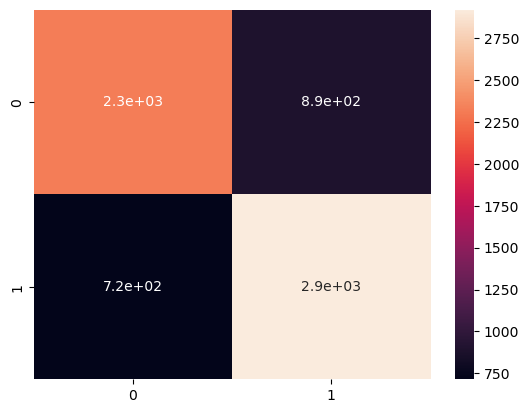

In [29]:
import seaborn as sns
sns.heatmap(ncf, annot = True)

### Improving the model for long position prediction
#### keeping only long positions that have probability of prediction > 60% 

In [30]:
modn.fit(train[features], train['target'])
preds = modn.predict_proba(test[features])[:,1]
preds[preds >=.6] = 1
preds[preds <.6] = 0
preds = pd.Series(preds, index=test.index, name="predictions")
combined = pd.concat([test["target"], preds], axis=1)

In [31]:
combined['predictions'] = combined['predictions'].astype(int)
combined

,target,predictions
datetime,,
1995-08-01,1,0
1995-08-02,0,0
1995-08-03,1,0
1995-08-04,0,0
1995-08-07,0,0
...,...,...
2023-03-22,0,0
2023-03-23,0,0
2023-03-24,1,0


In [32]:
precision_score(combined["target"], combined["predictions"])

0.9361702127659575

In [33]:
combined["predictions"].value_counts()

0    5202
1    1645
Name: predictions, dtype: int64

In [34]:
combined["target"].value_counts()

1    3634
0    3213
Name: target, dtype: int64

In [35]:
combined["target"].value_counts()/ combined.shape[0]

1    0.530743
0    0.469257
Name: target, dtype: float64

In [36]:
from sklearn.metrics import classification_report
ncr = classification_report(combined["target"], combined['predictions'])
print(ncr)


              precision    recall  f1-score   support

           0       0.60      0.97      0.74      3213
           1       0.94      0.42      0.58      3634

    accuracy                           0.68      6847
   macro avg       0.77      0.70      0.66      6847
weighted avg       0.78      0.68      0.66      6847



In [37]:
ncf = confusion_matrix(combined["target"], combined['predictions'], labels = [0,1])
ncf

array([[3108,  105],
       [2094, 1540]], dtype=int64)

<AxesSubplot:>

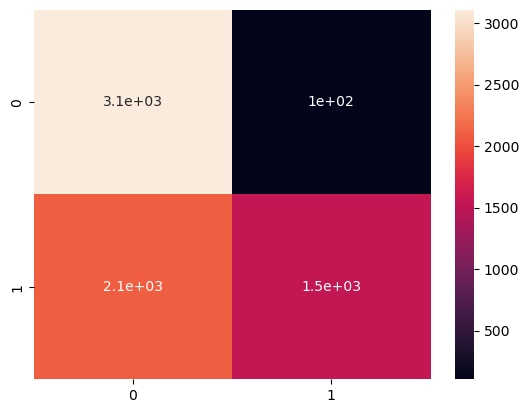

In [38]:
sns.heatmap(ncf, annot =True)

In [39]:
import pickle

with open('niftyclf.pkl', 'wb') as f:
    pickle.dump(modn, f)

### Preprocessing Banknifty historical data

In [40]:
bnifty = tv.get_hist(symbol='BANKNIFTY',exchange='NSE',interval=Interval.in_daily,n_bars=10000)
bnifty

,symbol,open,high,low,close,volume
datetime,,,,,,
2000-01-03 09:15:00,NSE:BANKNIFTY,1054.8101,1054.8101,1054.8101,1054.8101,0.0
2000-01-04 09:15:00,NSE:BANKNIFTY,1092.0800,1092.0800,1092.0800,1092.0800,0.0
2000-01-05 09:15:00,NSE:BANKNIFTY,1055.9900,1055.9900,1055.9900,1055.9900,0.0
2000-01-06 09:15:00,NSE:BANKNIFTY,1086.6700,1086.6700,1086.6700,1086.6700,0.0
2000-01-07 09:15:00,NSE:BANKNIFTY,1126.9900,1126.9900,1126.9900,1126.9900,0.0
...,...,...,...,...,...,...
2023-03-22 09:15:00,NSE:BANKNIFTY,40036.0000,40085.6020,39837.8010,39999.0510,143616857.0
2023-03-23 09:15:00,NSE:BANKNIFTY,39836.1480,40201.6020,39552.5000,39616.8980,153170787.0
2023-03-24 09:15:00,NSE:BANKNIFTY,39555.2500,39767.8980,39294.8980,39395.3520,166141025.0


In [41]:
bnifty.reset_index(inplace = True)
bnifty

,datetime,symbol,open,high,low,close,volume
0,2000-01-03 09:15:00,NSE:BANKNIFTY,1054.8101,1054.8101,1054.8101,1054.8101,0.0
1,2000-01-04 09:15:00,NSE:BANKNIFTY,1092.0800,1092.0800,1092.0800,1092.0800,0.0
2,2000-01-05 09:15:00,NSE:BANKNIFTY,1055.9900,1055.9900,1055.9900,1055.9900,0.0
3,2000-01-06 09:15:00,NSE:BANKNIFTY,1086.6700,1086.6700,1086.6700,1086.6700,0.0
4,2000-01-07 09:15:00,NSE:BANKNIFTY,1126.9900,1126.9900,1126.9900,1126.9900,0.0
...,...,...,...,...,...,...,...
5758,2023-03-22 09:15:00,NSE:BANKNIFTY,40036.0000,40085.6020,39837.8010,39999.0510,143616857.0
5759,2023-03-23 09:15:00,NSE:BANKNIFTY,39836.1480,40201.6020,39552.5000,39616.8980,153170787.0
5760,2023-03-24 09:15:00,NSE:BANKNIFTY,39555.2500,39767.8980,39294.8980,39395.3520,166141025.0
5761,2023-03-27 09:15:00,NSE:BANKNIFTY,39484.6990,39695.1990,39273.7500,39431.3010,194157987.0


In [42]:
bnifty['datetime'] = bnifty['datetime'].dt.date
bnifty.set_index(bnifty['datetime'], drop = True, inplace = True)
bnifty.drop('datetime', axis=1, inplace = True)
bnifty

,symbol,open,high,low,close,volume
datetime,,,,,,
2000-01-03,NSE:BANKNIFTY,1054.8101,1054.8101,1054.8101,1054.8101,0.0
2000-01-04,NSE:BANKNIFTY,1092.0800,1092.0800,1092.0800,1092.0800,0.0
2000-01-05,NSE:BANKNIFTY,1055.9900,1055.9900,1055.9900,1055.9900,0.0
2000-01-06,NSE:BANKNIFTY,1086.6700,1086.6700,1086.6700,1086.6700,0.0
2000-01-07,NSE:BANKNIFTY,1126.9900,1126.9900,1126.9900,1126.9900,0.0
...,...,...,...,...,...,...
2023-03-22,NSE:BANKNIFTY,40036.0000,40085.6020,39837.8010,39999.0510,143616857.0
2023-03-23,NSE:BANKNIFTY,39836.1480,40201.6020,39552.5000,39616.8980,153170787.0
2023-03-24,NSE:BANKNIFTY,39555.2500,39767.8980,39294.8980,39395.3520,166141025.0


<AxesSubplot:xlabel='datetime'>

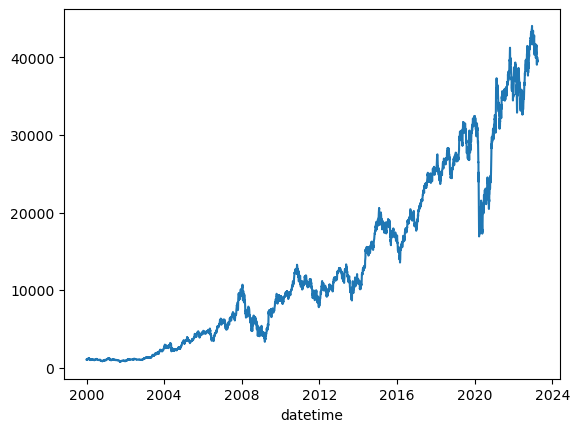

In [43]:
bnifty['close'].plot()

In [44]:
bnifty.isnull().any()

symbol    False
open      False
high      False
low       False
close     False
volume    False
dtype: bool

In [45]:
bnifty['target'] = (bnifty['close'].shift(-1)) > (bnifty['close'])

In [46]:
bnifty['target'] = bnifty['target'].apply(lambda x: 1 if x == True else 0)

In [47]:
bnifty['5_ma_ratio'] = bnifty['close']/bnifty['close'].rolling(5).mean()
bnifty['21_ma_ratio'] = bnifty['close']/bnifty['close'].rolling(21).mean()
bnifty['62_ma_ratio'] = bnifty['close']/bnifty['close'].rolling(62).mean()
bnifty

,symbol,open,high,low,close,volume,target,5_ma_ratio,21_ma_ratio,62_ma_ratio
datetime,,,,,,,,,,
2000-01-03,NSE:BANKNIFTY,1054.8101,1054.8101,1054.8101,1054.8101,0.0,1,NaN,NaN,NaN
2000-01-04,NSE:BANKNIFTY,1092.0800,1092.0800,1092.0800,1092.0800,0.0,0,NaN,NaN,NaN
2000-01-05,NSE:BANKNIFTY,1055.9900,1055.9900,1055.9900,1055.9900,0.0,1,NaN,NaN,NaN
2000-01-06,NSE:BANKNIFTY,1086.6700,1086.6700,1086.6700,1086.6700,0.0,1,NaN,NaN,NaN
2000-01-07,NSE:BANKNIFTY,1126.9900,1126.9900,1126.9900,1126.9900,0.0,0,1.040323,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-03-22,NSE:BANKNIFTY,40036.0000,40085.6020,39837.8010,39999.0510,143616857.0,0,1.010146,0.995025,0.966958
2023-03-23,NSE:BANKNIFTY,39836.1480,40201.6020,39552.5000,39616.8980,153170787.0,0,0.998054,0.986754,0.958486
2023-03-24,NSE:BANKNIFTY,39555.2500,39767.8980,39294.8980,39395.3520,166141025.0,1,0.993488,0.981935,0.954331


In [48]:
bnifty.dropna(axis = 0, inplace = True)
bnifty

,symbol,open,high,low,close,volume,target,5_ma_ratio,21_ma_ratio,62_ma_ratio
datetime,,,,,,,,,,
2000-03-31,NSE:BANKNIFTY,1106.83000,1106.83000,1106.83000,1106.83000,0.0,1,1.021008,1.033047,1.009177
2000-04-03,NSE:BANKNIFTY,1110.14000,1110.14000,1110.14000,1110.14000,0.0,0,1.016736,1.037508,1.011372
2000-04-04,NSE:BANKNIFTY,1026.65000,1026.65000,1026.65000,1026.65000,0.0,0,0.948002,0.964391,0.936211
2000-04-05,NSE:BANKNIFTY,1000.84000,1000.84000,1000.84000,1000.84000,0.0,0,0.936148,0.945384,0.913415
2000-04-06,NSE:BANKNIFTY,989.20001,989.20001,989.20001,989.20001,0.0,1,0.945037,0.940199,0.904089
...,...,...,...,...,...,...,...,...,...,...
2023-03-22,NSE:BANKNIFTY,40036.00000,40085.60200,39837.80100,39999.05100,143616857.0,0,1.010146,0.995025,0.966958
2023-03-23,NSE:BANKNIFTY,39836.14800,40201.60200,39552.50000,39616.89800,153170787.0,0,0.998054,0.986754,0.958486
2023-03-24,NSE:BANKNIFTY,39555.25000,39767.89800,39294.89800,39395.35200,166141025.0,1,0.993488,0.981935,0.954331


In [49]:
sc = get_best_param(bnifty)

In [50]:
sc

,n_estimators,min_samples_split,precision_score
0,100,60,0.762389
1,100,80,0.729382
2,100,100,0.709517
3,100,150,0.672648
4,100,200,0.654745
5,150,60,0.765740
6,150,80,0.729572
7,150,100,0.709613
8,150,150,0.671867
9,150,200,0.656010


### Training the model with best parameters and analysing the classification report and confusion matrix

In [51]:
modbn = RandomForestClassifier(n_estimators=200, min_samples_split =60, random_state = 1)
train = bnifty[:-800]
test = bnifty[800:]

features = ['open', 'high', 'low', 'close', '5_ma_ratio', '21_ma_ratio', '62_ma_ratio']
modbn.fit(train[features], train['target'])
predictions = pd.Series(modbn.predict(test[features]), index = test.index)
print(precision_score(test['target'], predictions))

0.7700308166409862


In [52]:
predictions.value_counts()

1    2596
0    2306
dtype: int64

In [53]:
test['target'].value_counts()

1    2594
0    2308
Name: target, dtype: int64

In [54]:
test['target'].value_counts()/test.shape[0]

1    0.529172
0    0.470828
Name: target, dtype: float64

In [55]:
from sklearn.metrics import classification_report
bcr = classification_report(test["target"], predictions)
print(bcr)

              precision    recall  f1-score   support

           0       0.74      0.74      0.74      2308
           1       0.77      0.77      0.77      2594

    accuracy                           0.76      4902
   macro avg       0.76      0.76      0.76      4902
weighted avg       0.76      0.76      0.76      4902



In [56]:
from sklearn.metrics import confusion_matrix

bcf = confusion_matrix(test["target"], predictions, labels = [0,1])
bcf 

array([[1711,  597],
       [ 595, 1999]], dtype=int64)

<AxesSubplot:>

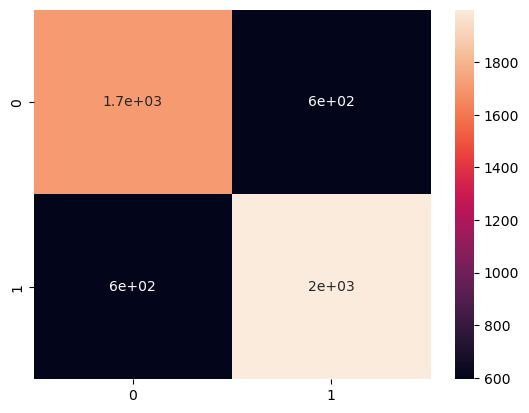

In [57]:
import seaborn as sns
sns.heatmap(bcf, annot = True)

###  Improving the model for long position prediction
#### keeping only long positions that have probability of prediction > 60% 

In [58]:
modbn.fit(train[features], train['target'])
preds = modbn.predict_proba(test[features])[:,1]
preds[preds >=.6] = 1
preds[preds <.6] = 0
preds = pd.Series(preds, index=test.index, name="predictions")
combined = pd.concat([test["target"], preds], axis=1)

In [59]:
combined['predictions'] = combined['predictions'].astype(int)
combined

,target,predictions
datetime,,
2003-06-16,1,0
2003-06-17,0,0
2003-06-18,1,1
2003-06-19,1,1
2003-06-20,0,0
...,...,...
2023-03-22,0,0
2023-03-23,0,0
2023-03-24,1,0


In [60]:
precision_score(combined["target"], combined["predictions"])

0.9230769230769231

In [61]:
combined["predictions"].value_counts()

0    3810
1    1092
Name: predictions, dtype: int64

In [62]:
combined["target"].value_counts()

1    2594
0    2308
Name: target, dtype: int64

In [63]:
combined["target"].value_counts()/ combined.shape[0]

1    0.529172
0    0.470828
Name: target, dtype: float64

In [64]:
print(modbn.predict(test[-1:][features]))

[0]


In [65]:
from sklearn.metrics import classification_report
bcr = classification_report(combined["target"], combined['predictions'])
print(bcr)


              precision    recall  f1-score   support

           0       0.58      0.96      0.73      2308
           1       0.92      0.39      0.55      2594

    accuracy                           0.66      4902
   macro avg       0.75      0.68      0.64      4902
weighted avg       0.76      0.66      0.63      4902



In [66]:
bcf = confusion_matrix(combined["target"], combined["predictions"], labels = [0,1])
bcf                                            

array([[2224,   84],
       [1586, 1008]], dtype=int64)

<AxesSubplot:>

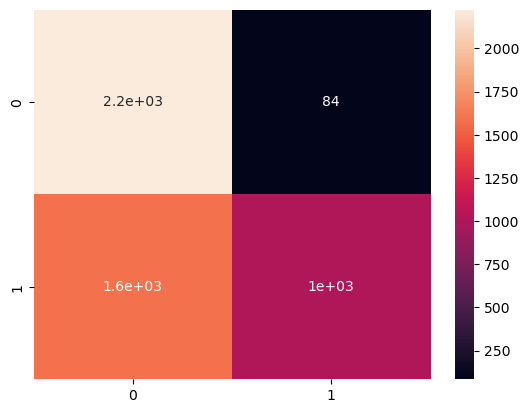

In [67]:
sns.heatmap(bcf, annot = True)

In [68]:
import pickle

with open('bniftyclf.pkl', 'wb') as f:
    pickle.dump(modbn, f)